# Project: Classification - Diabetes Prediction

Welcome to the project on classification. We will use diabetes health indicators dataset for this problem.

----------------
## Context:
----------------

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy.

Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy.

* Total: 38.4 million people have diabetes (11.6% of the US population)
* Diagnosed: 29.7 million people, including 29.4 million adults
* Undiagnosed: 8.7 million people (22.8% of adults are undiagnosed)
* Prediabetes:
Total: 97.6 million people aged 18 years or older have prediabetes (38.0% of the adult US population)
65 years or older: 27.2 million people aged 65 years or older (48.8%) have prediabetes


------------------
## Objective:
------------------

* Objective: Optimize Diabetes Prediction Model for Toddlers to Teenagers
* Goal: Minimize False Positives to Avoid Unnecessary Stress and Medical Procedures
* Rationale: By reducing false positives, we can:
- Avoid causing unnecessary stress and anxiety for healthy individuals
- Prevent unnecessary medical procedures and lifestyle changes
- Encourage individuals who may be at risk to seek further confirmation and testing
- Enable earlier detection and treatment of true diabetes cases in the general population.


------------------
## Data Dictionary:
------------------

The data contains the following attributes:
Categorical:
* **BMI**
* **GenHlth**
* **MentHlth**
* **PhysHlth**
* **Age**
* **Income**

Numerical:
* **Diabetes_012**: 0- No Diabetes, 1- Pre-diabetes, 2- Diabetes
* **HighBP**
* **HighChol**
* **CholCheck**
* **Smoker**
* **HeartDiseaseorAttack**
* **AnyHealthcare**
* **Sex**
* **Stroke**
* **HvyAlcoholConsumption**
* **NoDocbcCost**
* **Age**
* **Education**

### Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [ ]:
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1UlPmNQqOdVZnqsvXEFPqJccd0L434v6w/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head().T

,0,1,2,3,4
Diabetes_012,0.0,0.0,0.0,0.0,0.0
HighBP,1.0,0.0,1.0,1.0,1.0
HighChol,1.0,0.0,1.0,0.0,1.0
CholCheck,1.0,0.0,1.0,1.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0
Smoker,1.0,1.0,0.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0
Fruits,0.0,0.0,1.0,1.0,1.0


In [ ]:
data.shape

(253680, 22)

There are 253680 rows of data with 22 columns containing predictors and one target variable.

In [ ]:
data.isnull().any()

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

The dataset has no null/missing values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

The above numbers indicate that there are no missing values for any data column.

In [ ]:
data.isnull().mean()*100

Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

In [ ]:
data.duplicated().sum()

23899

In [ ]:
data.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [ ]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


We can drop Fruits, Veggies, Education as they don't contribute to the target value prediction.

In [ ]:
data.drop('Fruits',axis=1,inplace=True)
data.drop('Veggies',axis=1,inplace=True)
data.drop('Education',axis=1,inplace=True)
data.drop('DiffWalk',axis=1,inplace=True)
data.drop('PhysActivity',axis=1,inplace=True)

**Segregating numerical and categorical column values**

In [ ]:
num_cols=['BMI','GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']
cat_cols=['Diabetes_012','HighBP', 'HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','AnyHealthcare', 'Sex']

In [ ]:
data[num_cols]

,BMI,GenHlth,MentHlth,PhysHlth,Age,Income
0,40.0,5.0,18.0,15.0,9.0,3.0
1,25.0,3.0,0.0,0.0,7.0,1.0
2,28.0,5.0,30.0,30.0,9.0,8.0
3,27.0,2.0,0.0,0.0,11.0,6.0
4,24.0,2.0,3.0,0.0,11.0,4.0
...,...,...,...,...,...,...
253675,45.0,3.0,0.0,5.0,5.0,7.0
253676,18.0,4.0,0.0,0.0,11.0,4.0
253677,28.0,1.0,0.0,0.0,2.0,2.0
253678,23.0,3.0,0.0,0.0,7.0,1.0


In [ ]:
data[cat_cols]

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,AnyHealthcare,Sex
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
253676,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
253677,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
253678,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
data['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Diabetes_012 has dicrete values.

# Exploratory Data Analysis - EDA

**Univariate Analysis**

Creating and analyzing Numerical and Categorical variables with Graph and Tables

In [ ]:
for i in cat_cols:
    print(data[i].value_counts(normalize=True)*100)
    print('*'*40)

Diabetes_012
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: proportion, dtype: float64
****************************************
HighBP
0.0    57.09989
1.0    42.90011
Name: proportion, dtype: float64
****************************************
HighChol
0.0    57.587906
1.0    42.412094
Name: proportion, dtype: float64
****************************************
CholCheck
1.0    96.26695
0.0     3.73305
Name: proportion, dtype: float64
****************************************
Smoker
0.0    55.683144
1.0    44.316856
Name: proportion, dtype: float64
****************************************
Stroke
0.0    95.94292
1.0     4.05708
Name: proportion, dtype: float64
****************************************
HeartDiseaseorAttack
0.0    90.581441
1.0     9.418559
Name: proportion, dtype: float64
****************************************
AnyHealthcare
1.0    95.105251
0.0     4.894749
Name: proportion, dtype: float64
****************************************
Sex
0.0    55.965784
1.0    44.034216

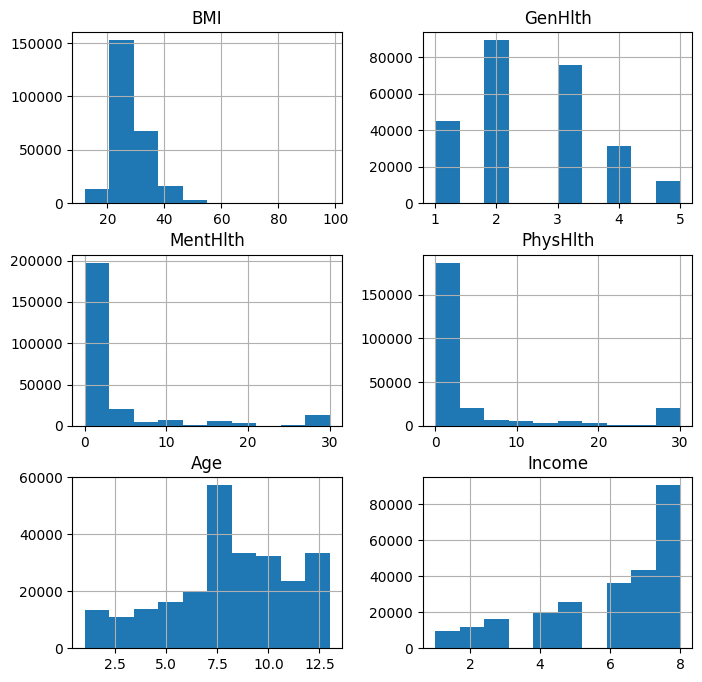

In [ ]:
data[num_cols].hist(figsize=(8,8))
plt.show()

 - All the numerical columns are heavily skewed.
 - BMI, MentHlth, PhysHlth are right skewed which means all parameters have most values in the lower ranges.
 - Age, Income is left skewed which means most values of these parameters are in the high range.
 - GenHlth is symmetric.
 - We will plot kde plot to further understand the distribution.

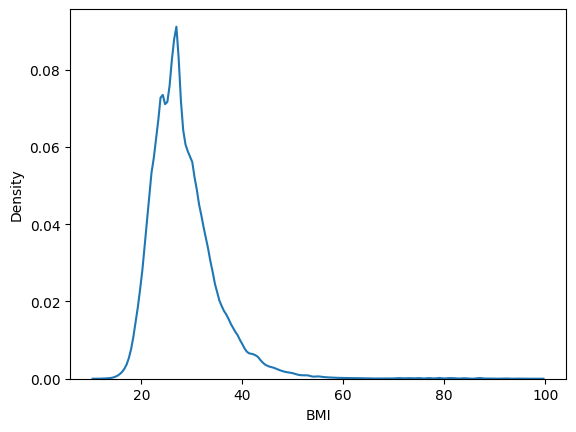

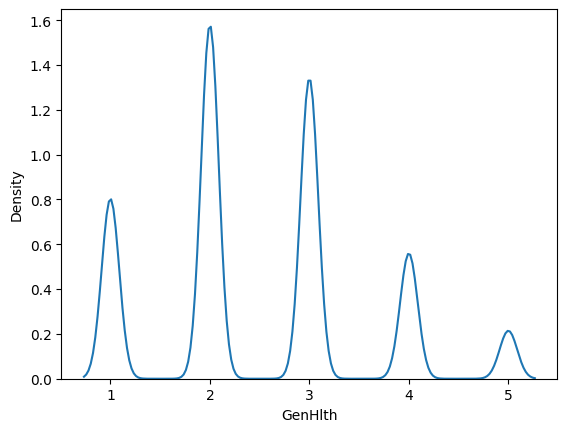

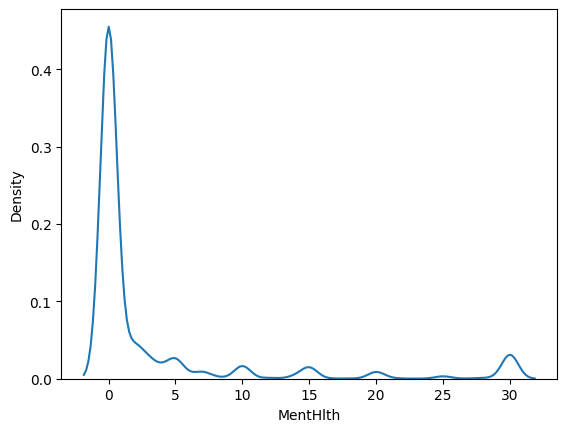

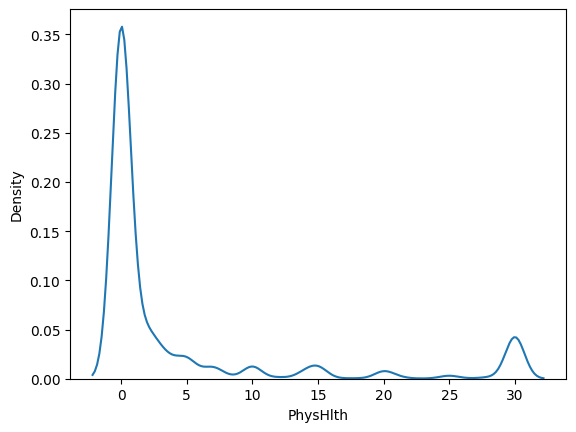

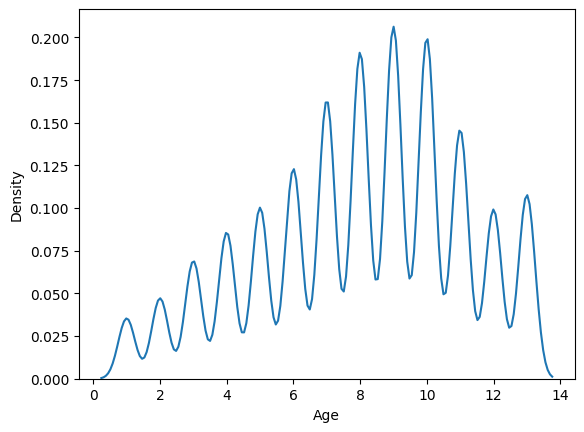

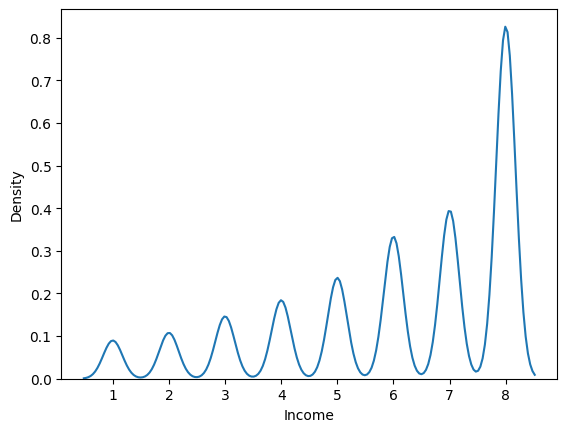

In [ ]:
import seaborn as sns
for i in num_cols:
  sns.kdeplot(data=data,x=i,gridsize=200)
  plt.show()

Checking the skewness of Numerical columns.

In [ ]:
print(data['BMI'].skew())
print(data['GenHlth'].skew())
print(data['MentHlth'].skew())
print(data['PhysHlth'].skew())
print(data['Age'].skew())
print(data['Income'].skew())

2.122003758291108
0.42286687511201615
2.721148365662696
2.2073949151986723
-0.35990324786631667
-0.8913449906673198


All variable are skewed.

**Bivariate Analysis and Multivariate Analysis**

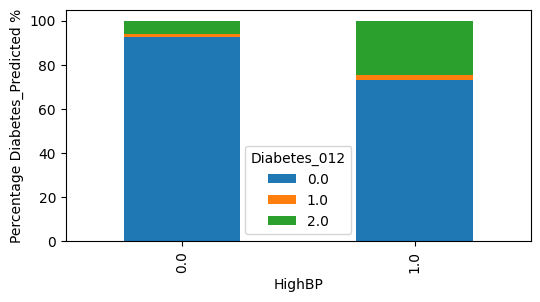

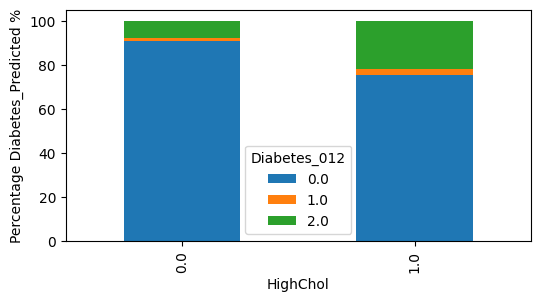

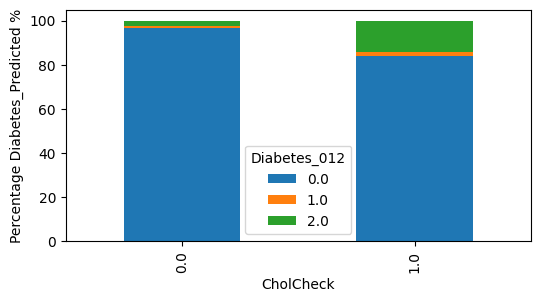

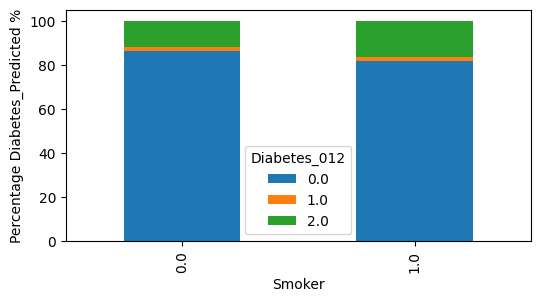

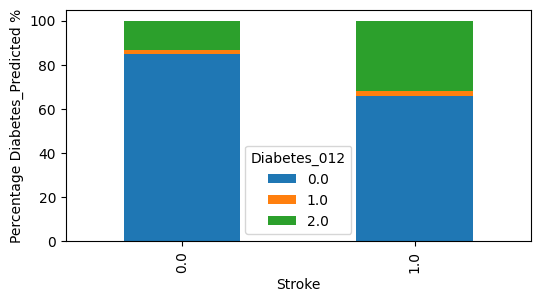

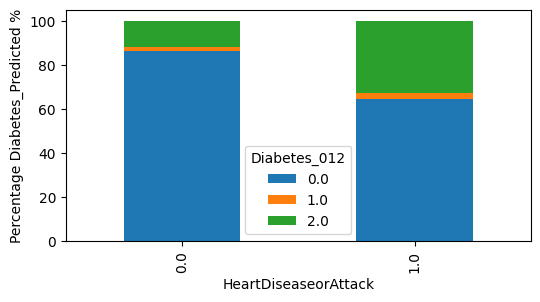

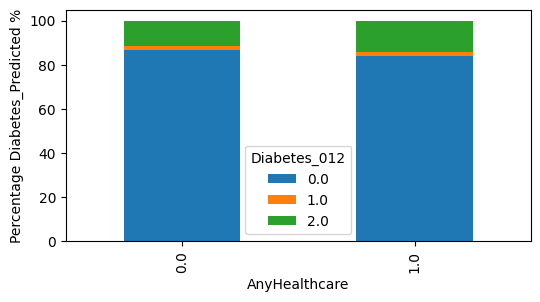

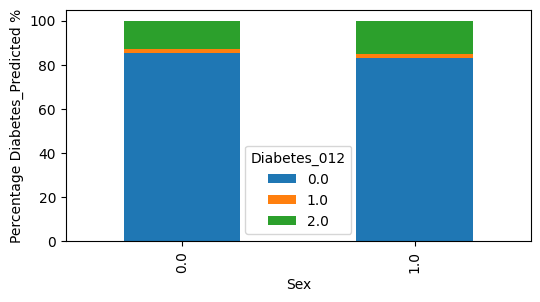

In [ ]:
for i in cat_cols:
    if i!='Diabetes_012':
        (pd.crosstab(data[i],data['Diabetes_012'],normalize='index')*100).plot(kind='bar',figsize=(6,3),stacked=True)
        plt.ylabel('Percentage Diabetes_Predicted %')

Observations:

*   Considering HighBP, around 30% people are diagnosed with diabetes.

*   People with histoy of heart disease or heart attack have around 35% chances of getting diabetes.

*   Considering sex, we can see both male and female population are equally diagnosed with diabetes.

*  People with high cholestrol have a 20% chance of getting diabetes.

*  People with or without any kind of healthcare have a lesser chance (<20%) chance of getting diabetes.

*  Smokers show greater than 20% chances of getting diagnosed with diabetes.









*Let's check the relationship between attrition and Numerical variables

In [ ]:
data.groupby(['Diabetes_012'])[num_cols].mean()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Income
Diabetes_012,,,,,,
0.0,27.742521,2.372391,2.944404,3.582416,7.786559,6.208663
1.0,30.724466,2.975599,4.529907,6.348305,9.083351,5.351112
2.0,31.944011,3.290981,4.461806,7.954479,9.379053,5.210094


**Creating Correlation Heatmap**

<Axes: >

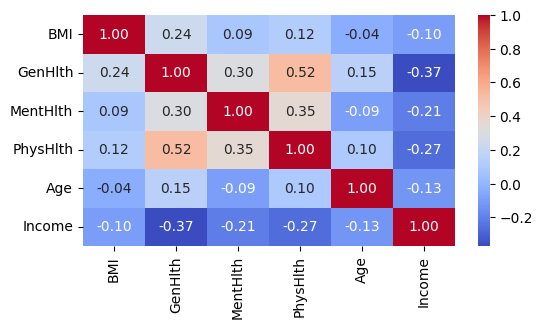

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(data[num_cols].corr(),annot=True, fmt='0.2f', cmap='coolwarm')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   HvyAlcoholConsump     253680 non-null  float64
 9   AnyHealthcare         253680 non-null  float64
 10  NoDocbcCost           253680 non-null  float64
 11  GenHlth               253680 non-null  float64
 12  MentHlth              253680 non-null  float64
 13  PhysHlth              253680 non-null  float64
 14  Sex                   253680 non-null  float64
 15  

**Splitting the dependent and independent variable**

In [ ]:
Y=data['Diabetes_012']

In [ ]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_012, dtype: float64

We will create logarithm columns of numerical columns to convert skewed distribution to normal distribution.This will help improving accuracy of linear models.

In [ ]:
l=np.log(data['BMI'])
l2=np.sqrt(data['GenHlth'])
l3=np.sqrt(data['MentHlth'])
l4=np.log(data['PhysHlth'])
l5=np.log(data['Age'])
l6=np.log(data['Income'])

X=data.drop(['Diabetes_012','BMI'],axis=1)
X['log_BMI']=l

# X=data.drop([])

We have conducted multiple intertions for transformation(log and sqrt) on the variables and the best result were obtained with log transformation of BMI.

In [ ]:
X_dt=data.drop('Diabetes_012',axis=1)

Best operation on numerical variable for getting best accuracy can be obtained by iterative process.



In [ ]:
X.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,Sex,Age,Income,log_BMI
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,0.0,9.0,3.0,3.688879
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,7.0,1.0,3.218876
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,0.0,9.0,8.0,3.332205
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,6.0,3.295837
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0,4.0,3.178054


# Scaling the Data:

The independent variables in this dataset have different scales. When features have differing scales from each other, there is a chance that a higher weightage will be given to features which have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of a sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [ ]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
sc=StandardScaler()
X_scaled_dt=sc.fit_transform(X_dt)
X_scaled_dt=pd.DataFrame(X_scaled_dt, columns=X_dt.columns)

In [ ]:
X_scaled

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,Sex,Age,Income,log_BMI
0,1.153688,1.165254,0.196922,1.120927,-0.205637,-0.322458,-0.244014,0.226863,-0.303173,2.329121,1.998592,1.233999,-0.887021,0.316900,-1.474487,1.748237
1,-0.866785,-0.858182,-5.078164,1.120927,-0.205637,-0.322458,-0.244014,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.887021,-0.337933,-2.440138,-0.495123
2,1.153688,1.165254,0.196922,-0.892119,-0.205637,-0.322458,-0.244014,0.226863,3.298445,2.329121,3.617407,2.954590,-0.887021,0.316900,0.939638,0.045803
3,1.153688,-0.858182,0.196922,-0.892119,-0.205637,-0.322458,-0.244014,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.887021,0.971733,-0.026012,-0.127782
4,1.153688,1.165254,0.196922,-0.892119,-0.205637,-0.322458,-0.244014,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.887021,0.971733,-0.991662,-0.689969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.153688,1.165254,0.196922,-0.892119,-0.205637,-0.322458,-0.244014,0.226863,-0.303173,0.457294,-0.429630,0.086938,1.127369,-0.992766,0.456813,2.310424
253676,1.153688,1.165254,0.196922,-0.892119,-0.205637,-0.322458,-0.244014,0.226863,-0.303173,1.393207,-0.429630,-0.486592,-0.887021,0.971733,-0.991662,-2.063095
253677,-0.866785,-0.858182,0.196922,-0.892119,-0.205637,-0.322458,-0.244014,0.226863,-0.303173,-1.414532,-0.429630,-0.486592,-0.887021,-1.975015,-1.957312,0.045803
253678,1.153688,-0.858182,0.196922,-0.892119,-0.205637,-0.322458,-0.244014,0.226863,-0.303173,0.457294,-0.429630,-0.486592,1.127369,-0.337933,-2.440138,-0.893109


### Splitting the Data

Splitting the data in training and test set - 30 % Test, 70% Training set

In [ ]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=42,stratify=Y)

In [ ]:
X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X_scaled_dt,Y,test_size=0.3,random_state=42,stratify=Y)

Defining the Metric_Score() Function



In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No Diabetes', 'Pre Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Pre Diabetes', 'Diabetes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Methods: Model Evaluation Criteria**
The model can make two types of wrong predictions:

*   Predicting that a person can be diagnosed with diabetes when the person doesn't really have diabetes.
*   Predicting that a person is not diagnosed with diabetes even when the person shows sure signs of diabetes.

Which case is more important?

*   **False Positives:** Predicting that a person can be diagnosed with diabetes even when the person is healthy leads to predicting diabetes in patients who are not aware of any contributing factors. This could lead to financial burden and mental stress for the patient. If minimizing losses and avoiding unnecessary stress is more important, reducing false positives is more important.

*   **False Negatives:** Predicting that a person is not diagnosed with diabetes even when the person shows all signs and complications of diabetes will cause the person to loose preious time to make lifestyle changes and get necessary medical treatment.

Model can be evaluated based on accuracy of the model, precision and the feature importance:


*   Accuracy, Precision and the important feature variables have been changing when the models are tuned using grid search hyperparameter tuning. In order to increase early diabetes prediction, model parameters may need to be adjusted to prioritize lowering false positives. Precision shows ratio of correctly predicted positive observations to the total predicted positives. Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
*   More focus was given to increasing the accuracy and precision of the model and the final model has high accuracy of around 86%. This is the ratio of correctly predicted observation to the total observations.


#### Building the model

We will be building 2 different models:
- **Logistic Regression**
- **K-NN (K-Nearest Neighbour)**

**LOGISTIC REGRESSION MODEL**

The first model we are going to use is Logistic Regression.
Logistic Regression is a supervised learning algorithm which is primarily used for binary classification problems i.e. where the dependent variable is categorical and has only two possible values. For our problem set, we use logistic regression for multi-class classification since we have 3 data labels. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:
        P(y)=1/exp(1 + exp(-x))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
y_pred_lr=lr.fit(X_train,y_train)

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92    149592
         1.0       0.00      0.00      0.00      3242
         2.0       0.54      0.18      0.27     24742

    accuracy                           0.85    177576
   macro avg       0.47      0.39      0.40    177576
weighted avg       0.80      0.85      0.81    177576



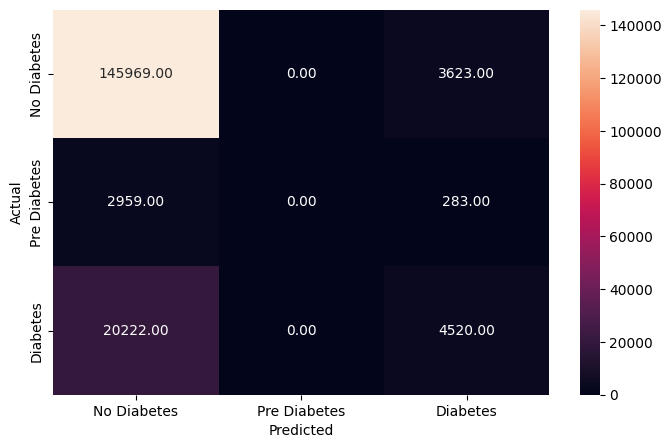

In [ ]:
y_train_pred_lr=lr.predict(X_train)
metrics_score(y_train,y_train_pred_lr)

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64111
         1.0       0.00      0.00      0.00      1389
         2.0       0.53      0.18      0.27     10604

    accuracy                           0.85     76104
   macro avg       0.46      0.39      0.40     76104
weighted avg       0.80      0.85      0.81     76104



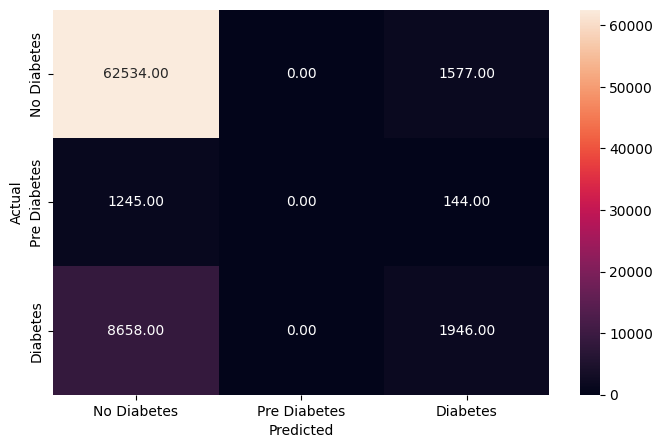

In [ ]:
y_test_pred_lr=lr.predict(X_test)
metrics_score(y_test,y_test_pred_lr)

 - We are getting an accuracy of around 85% on both test dataset and train dataset.
 - The recall for this model is 18% and precision is 53% on test data.

In [ ]:
cols=X_scaled.columns

coef_lg=lr.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0,1,2
Income,0.105198,-0.067064,-0.038135
HvyAlcoholConsump,0.066722,0.037183,-0.103905
PhysHlth,0.039240,-0.029556,-0.009684
Stroke,0.002731,-0.033055,0.030323
AnyHealthcare,0.001861,-0.021275,0.019414
Smoker,-0.007371,0.006538,0.000833
MentHlth,-0.009474,0.041126,-0.031652
HeartDiseaseorAttack,-0.018387,-0.030795,0.049181
NoDocbcCost,-0.029787,0.044726,-0.014939
Sex,-0.053394,-0.016384,0.069778


Features which string positive affect on the Diabetes Prediction are:
- Income
- Alcohol Consumption
- Physical Health
- Stroke
- Access to Any Healthcare


Features which string negative affect on the Diabetes Prediction are:
- Smoker
- Mental Health
- Heart Disease/Attack
- No Doctor Visits because of Costs
- Sex
- Cholestrol Check
- High BP
- High Cholestrol
- Age
- BMI
- General Health



The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into real odds by taking its exponential.

In [ ]:
odds = np.exp(lr.coef_[0])
importance_lr_df=pd.DataFrame(odds, X_scaled.columns, columns=['odds']).sort_values(by='odds', ascending=False)
importance_lr_df

,odds
Income,1.110931
HvyAlcoholConsump,1.068999
PhysHlth,1.040020
Stroke,1.002735
AnyHealthcare,1.001862
Smoker,0.992656
MentHlth,0.990571
HeartDiseaseorAttack,0.981781
NoDocbcCost,0.970653
Sex,0.948006


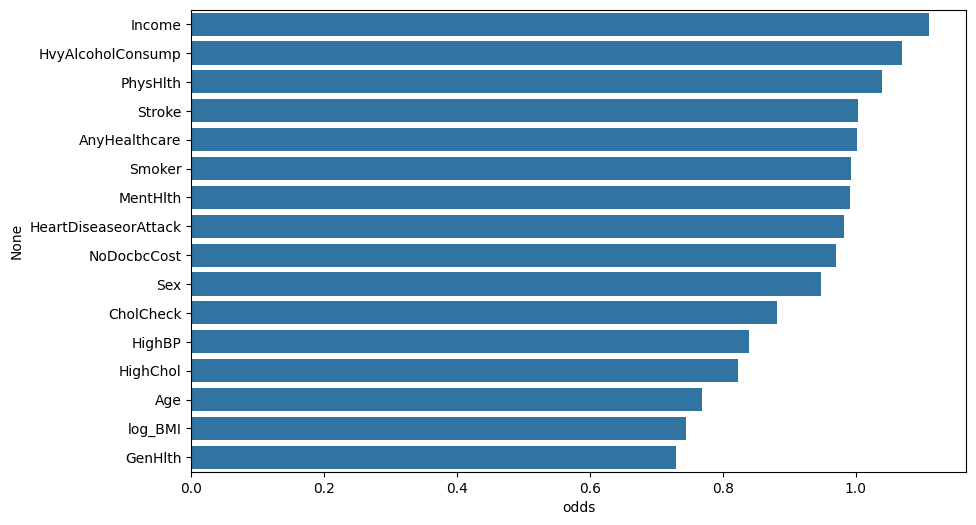

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=importance_lr_df.odds, y=importance_lr_df.index)
plt.show()

- The odds of income on diabtetes prediction is 1.2 times more than who doesn't have good income.
- The odds of a smoker on diabetes predictions is 1 times more than a person who doesn't smoke.
- Other variables have almost similar odds of diabetes prediction.

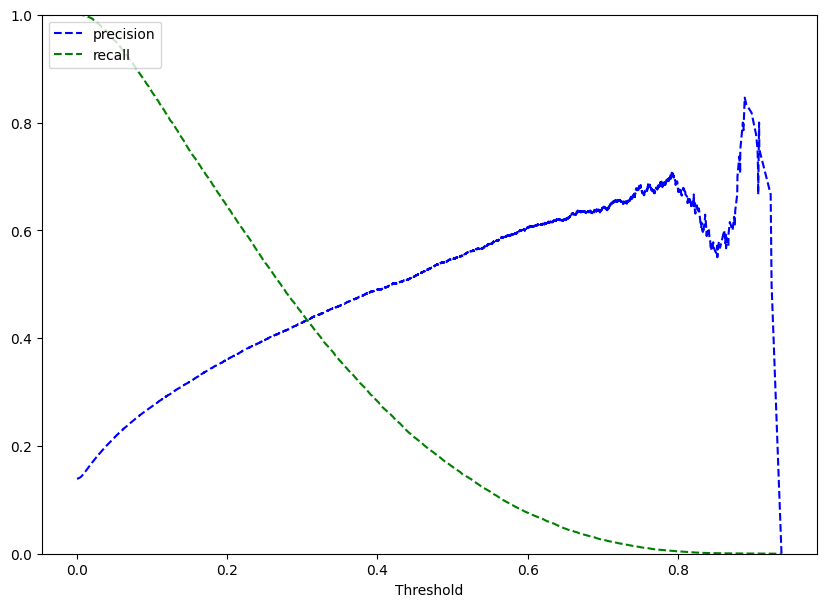

In [ ]:
y_scores_lr=lr.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class

from sklearn.preprocessing import label_binarize
classes = np.unique(y_train)
y_train_binarized = label_binarize(y_train, classes=classes)

for i in range(len(classes)):
  precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_train_binarized[:, i], y_scores_lr[:, i])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lr, precisions_lr[:-1], 'b--', label='precision')
plt.plot(thresholds_lr, recalls_lr[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

We can see that precision and recall are balanced for a threshold of about ~0.38.

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91    149592
         1.0       0.00      0.00      0.00      3242
         2.0       0.00      0.00      0.00     24742

    accuracy                           0.84    177576
   macro avg       0.28      0.33      0.30    177576
weighted avg       0.71      0.84      0.77    177576



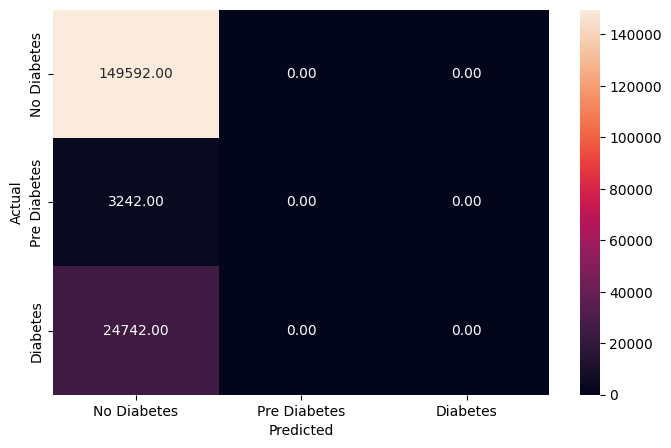

In [ ]:
optimal_threshold1=.38
y_pred_train_lr_thres = lr.predict_proba(X_train)
metrics_score(y_train, y_pred_train_lr_thres[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     64111
         1.0       0.00      0.00      0.00      1389
         2.0       0.00      0.00      0.00     10604

    accuracy                           0.84     76104
   macro avg       0.28      0.33      0.30     76104
weighted avg       0.71      0.84      0.77     76104



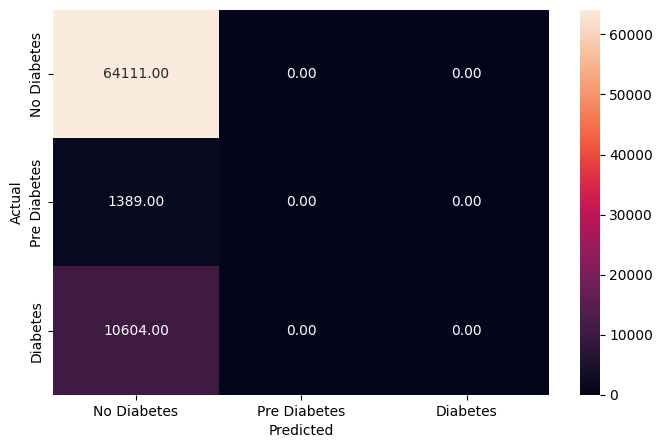

In [ ]:
optimal_threshold1=.38
y_pred_test_lr_thes = lr.predict_proba(X_test)
metrics_score(y_test, y_pred_test_lr_thes[:,1]>optimal_threshold1)

The accuracy is around 84%.

### K-NN (K-Nearest Neighbour)

The K-Nearest Neighbors algorithm (K-NN) is a method used for classification/regression. In both cases, the input consists of the k closest training examples in the feature space.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#initialize knn
knn = KNeighborsClassifier()

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93    149592
         1.0       0.42      0.02      0.04      3242
         2.0       0.67      0.36      0.47     24742

    accuracy                           0.87    177576
   macro avg       0.66      0.45      0.48    177576
weighted avg       0.85      0.87      0.85    177576



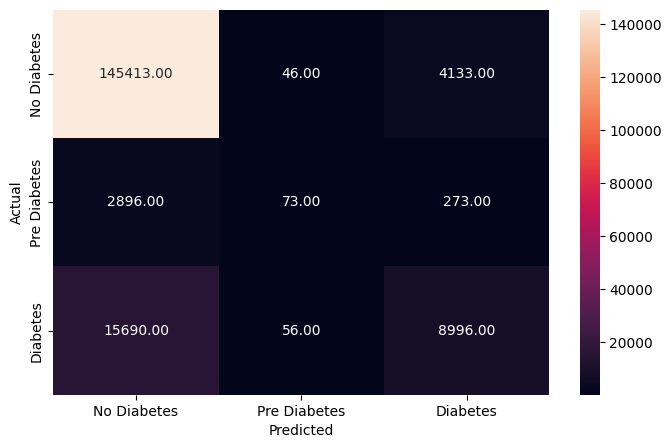

In [ ]:
# Predictions on training set
y_train_pred_knn = knn.predict(X_train)

# Model evaluation on training set
metrics_score(y_train, y_train_pred_knn)

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     64111
         1.0       0.02      0.00      0.00      1389
         2.0       0.42      0.23      0.30     10604

    accuracy                           0.83     76104
   macro avg       0.44      0.39      0.40     76104
weighted avg       0.79      0.83      0.81     76104



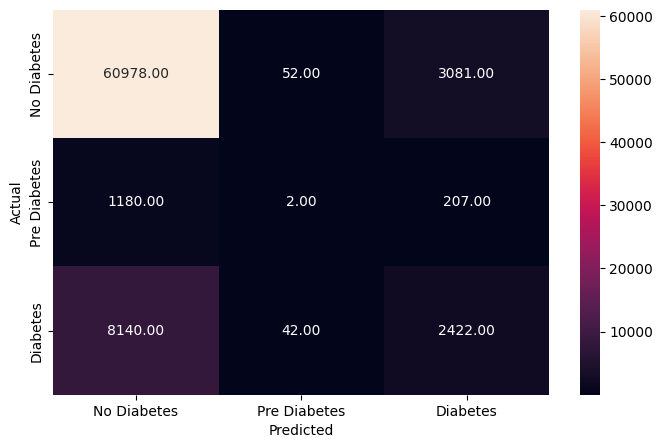

In [ ]:
# Predictions on test set
y_test_pred_knn = knn.predict(X_test)

# Model evaluation on test set
metrics_score(y_test, y_test_pred_knn)

The accuracy is around 83% with precision for 0 (no diabetes) as 87%, 1 (prediabetes) as 2%, 2(diabetes) as 42%. The recall for 0 (no diabetes) as 95%, 1 (prediabetes) as 0%, 2(diabetes) as 23%.

**Split the data into training and testing sets**

In [ ]:
# Assuming you have your data in X and y
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

# Train the KNN model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Feature importance using SelectKBest and f_classif
selector = SelectKBest(score_func=f_classif, k='all')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Get selected feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores.sort_values(by='Score', ascending=False, inplace=True)

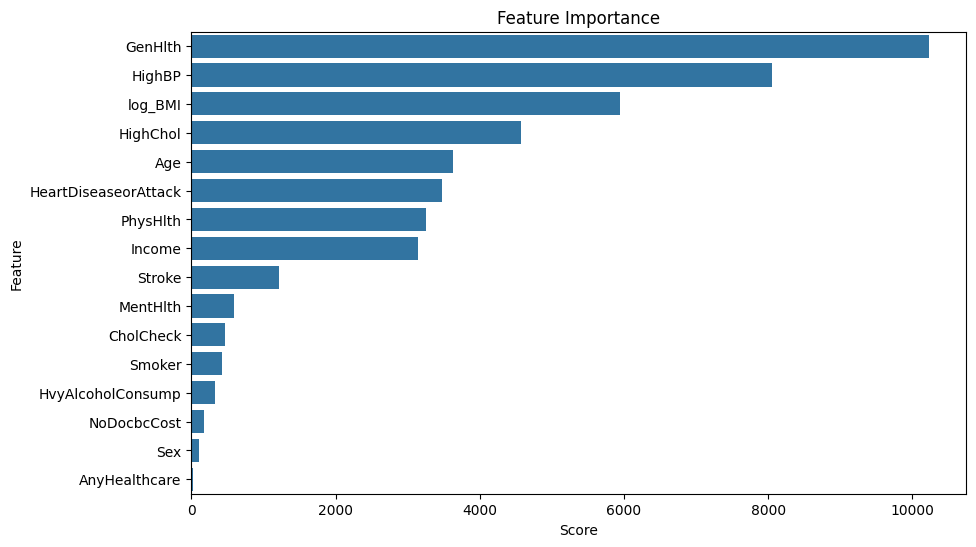

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Importance')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

GenHlth, High_BP are the two biggest features of importance for this K-NN model.

# Final Result

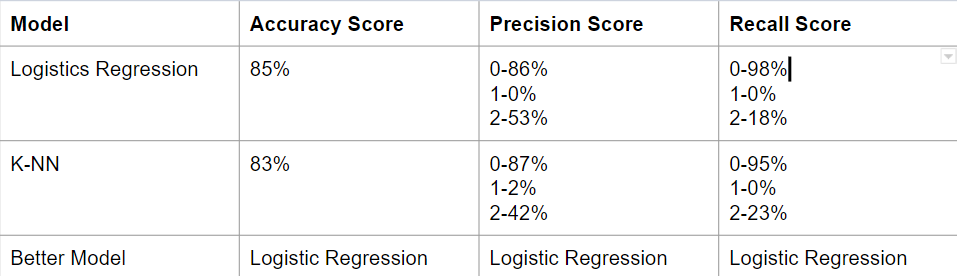